In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:

data_dir_train = pathlib.Path("C:\\Users\\raghr\\OneDrive - Hewlett Packard Enterprise\\Desktop_backup\\Upgrad\\Melanoma detection\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test = pathlib.Path('C:\\Users\\raghr\\OneDrive - Hewlett Packard Enterprise\\Desktop_backup\\Upgrad\\Melanoma detection\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


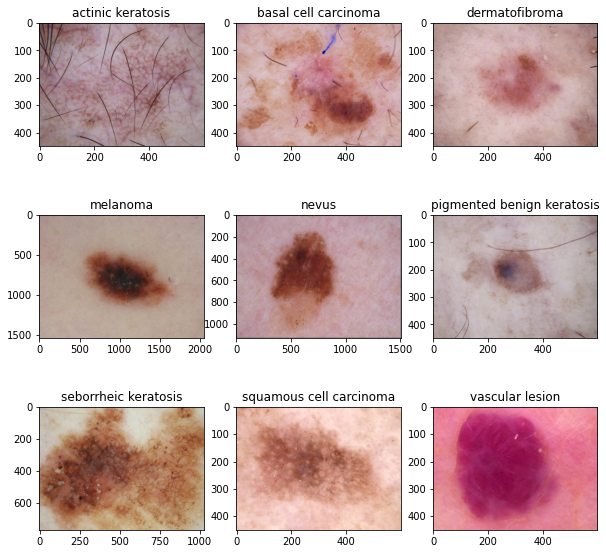

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [11]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [13]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


c:\programdata\miniconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 115s 2s/step - loss: 2.0572 - accuracy: 0.1987 - val_loss: 2.0282 - val_accuracy: 0.1924
Epoch 2/30
56/56 [==============================] - 118s 2s/step - loss: 2.0271 - accuracy: 0.1920 - val_loss: 2.0264 - val_accuracy: 0.1924
Epoch 3/30
56/56 [==============================] - 127s 2s/step - loss: 2.0462 - accuracy: 0.2132 - val_loss: 2.0366 - val_accuracy: 0.2058
Epoch 4/30
56/56 [==============================] - 118s 2s/step - loss: 2.0254 - accuracy: 0.1998 - val_loss: 2.0254 - val_accuracy: 0.2058
Epoch 5/30
56/56 [==============================] - 117s 2s/step - loss: 2.0061 - accuracy: 0.2160 - val_loss: 2.0041 - val_accuracy: 0.2371
Epoch 6/30
56/56 [==============================] - 112s 2s/step - loss: 1.9698 - accuracy: 0.2316 - val_loss: 2.0039 - val_accuracy: 0.2371
Epoch 7/30
56/56 [==============================] - 109s 2s/step - loss: 1.9681 - accuracy: 0.2388 - val_loss: 1.9528 - val_accuracy: 0.2573
Epoch 8/30
56/56 [======

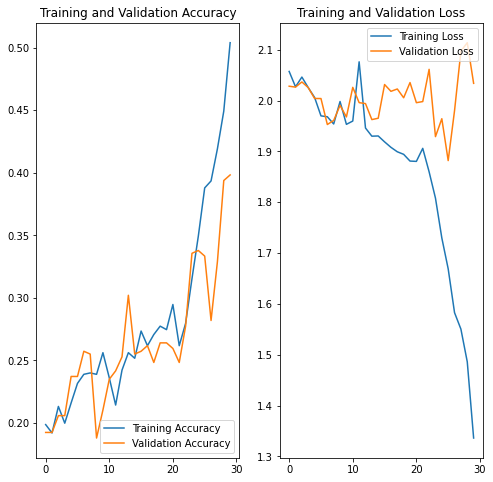

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

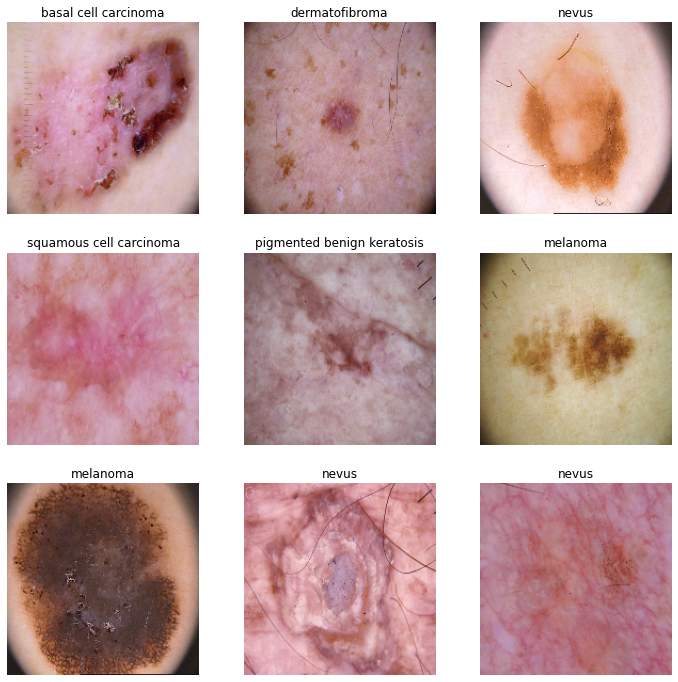

In [16]:
augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 134s 2s/step - loss: 2.0617 - accuracy: 0.1724 - val_loss: 2.0046 - val_accuracy: 0.2058
Epoch 2/30
56/56 [==============================] - 122s 2s/step - loss: 1.9381 - accuracy: 0.2511 - val_loss: 1.8531 - val_accuracy: 0.3087
Epoch 3/30
56/56 [==============================] - 123s 2s/step - loss: 1.7635 - accuracy: 0.3504 - val_loss: 1.7804 - val_accuracy: 0.3691
Epoch 4/30
56/56 [==============================] - 132s 2s/step - loss: 1.7708 - accuracy: 0.3527 - val_loss: 1.6734 - val_accuracy: 0.3982
Epoch 5/30
56/56 [==============================] - 1510s 27s/step - loss: 1.6272 - accuracy: 0.4051 - val_loss: 1.5947 - val_accuracy: 0.4474
Epoch 6/30
56/56 [==============================] - 126s 2s/step - loss: 1.6650 - accuracy: 0.3739 - val_loss: 1.6458 - val_accuracy: 0.3848
Epoch 7/30
56/56 [==============================] - 123s 2s/step - loss: 1.5985 - accuracy: 0.4252 - val_loss: 1.5451 - val_accuracy: 0.4519
Epoch 8/30


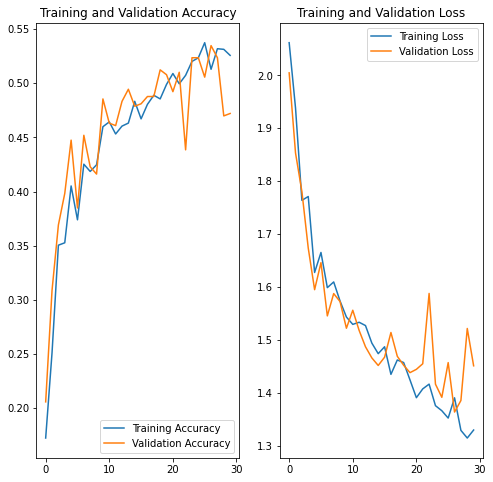

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
1,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
2,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
3,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
4,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
...,...,...
2234,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion
2235,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion
2236,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion
2237,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion


In [22]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
1,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
2,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
3,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
4,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,actinic keratosis
...,...,...
2234,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion
2235,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion
2236,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion
2237,C:\Users\raghr\OneDrive - Hewlett Packard Ente...,vascular lesion


<BarContainer object of 9 artists>

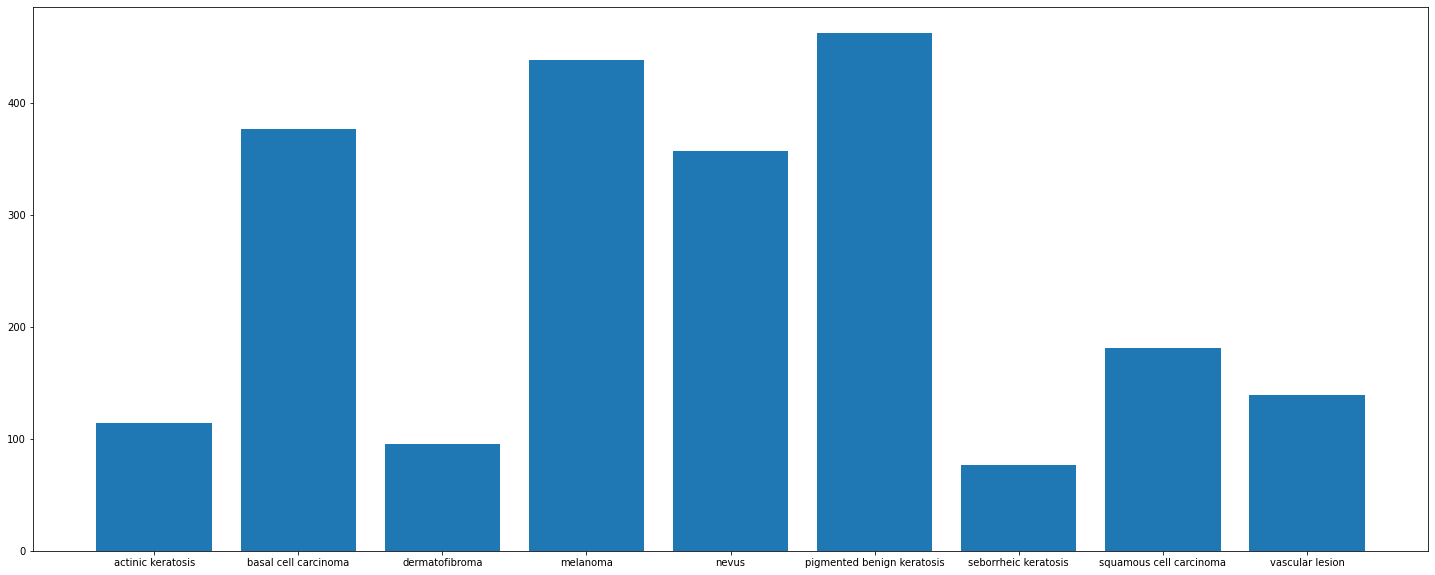

In [23]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [24]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
data_dir_train1 = pathlib.Path("C:\\Users\\raghr\\OneDrive - Hewlett Packard Enterprise\\Desktop_backup\\Upgrad\\Melanoma detection\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\Output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

In [ ]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("C:\\Users\\raghr\\OneDrive - Hewlett Packard Enterprise\\Desktop_backup\\Upgrad\\Melanoma detection\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

In [ ]:

for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

In [ ]:
new_df['Label'].value_counts()

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import pathlib
data_dir_train1=pathlib.Path("C:\\Users\\raghr\\OneDrive - Hewlett Packard Enterprise\\Desktop_backup\\Upgrad\\Melanoma detection\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")

In [ ]:
data_dir_train1

In [ ]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("C:\\Users\\raghr\\OneDrive - Hewlett Packard Enterprise\\Desktop_backup\\Upgrad\\Melanoma detection\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, axis=1),
              metrics=['accuracy'])

In [ ]:
epochs =50

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()